In [1]:
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from scipy.stats import linregress

In [2]:
variants_final_df = pd.read_csv('./results-newtimepts/variants_final.csv')
fitness_initial_df = pd.read_csv('./results-newtimepts/fitnesses_initial.csv')
fitness_final_df = pd.read_csv('./results-newtimepts/fitnesses_final.csv')

In [3]:
assay_labels = fitness_initial_df.columns.to_list()
control_set_indices = (variants_final_df.index[variants_final_df['control_set'] == True]).tolist()
trustworthy_assay_labels = ['trustworthy_' + element for element in assay_labels]
trustworthy_assay_for_variants = variants_final_df[trustworthy_assay_labels].iloc[control_set_indices]
assay_hBFA1 = 'hBFA1:'
assay_labels = [item.replace(assay_hBFA1, '') for item in assay_labels]
control_fitness_values_init = fitness_initial_df.iloc[control_set_indices]

control_fitness_values_init.columns = assay_labels
trustworthy_assay_for_variants.columns = assay_labels

control_fitness_values_init = control_fitness_values_init[trustworthy_assay_for_variants]

control_fitness_values_final = fitness_final_df.iloc[control_set_indices]

control_fitness_values_final.columns = assay_labels
control_fitness_values_final = control_fitness_values_final[trustworthy_assay_for_variants]
# control_fitness_values_final
# control_fitness_values_init

Delta_f = control_fitness_values_init - control_fitness_values_final
delta_f = control_fitness_values_init - np.nanmean(control_fitness_values_init)

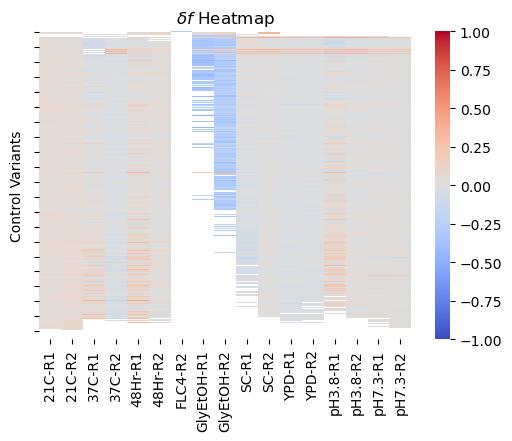

In [4]:
plt.figure(figsize=(6,4))
sns.heatmap(delta_f, cmap='coolwarm',vmin=-1,vmax=1)
# plt.xlabel('Assay Labels')
plt.ylabel('Control Variants')
plt.gca().set_yticklabels([])
plt.title('$\delta f$ Heatmap')
plt.show()

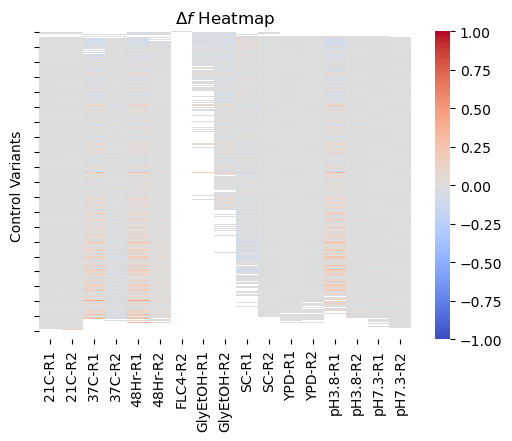

In [5]:
plt.figure(figsize=(6,4))
sns.heatmap(Delta_f, cmap='coolwarm',vmin=-1,vmax=1)
# plt.xlabel('Assay Labels')
plt.ylabel('Control Variants')
plt.gca().set_yticklabels([])
plt.title('$\Delta f$ Heatmap')
plt.show()

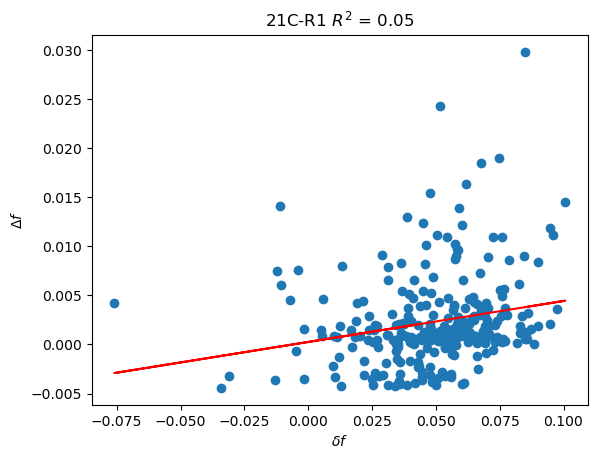

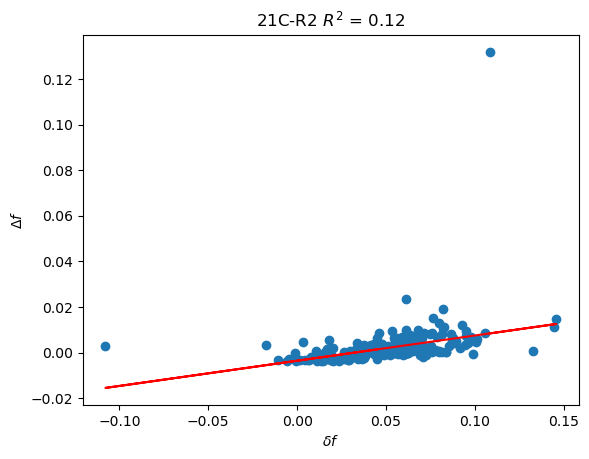

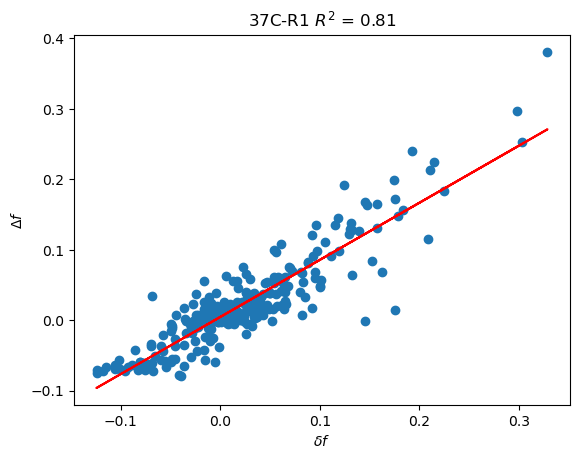

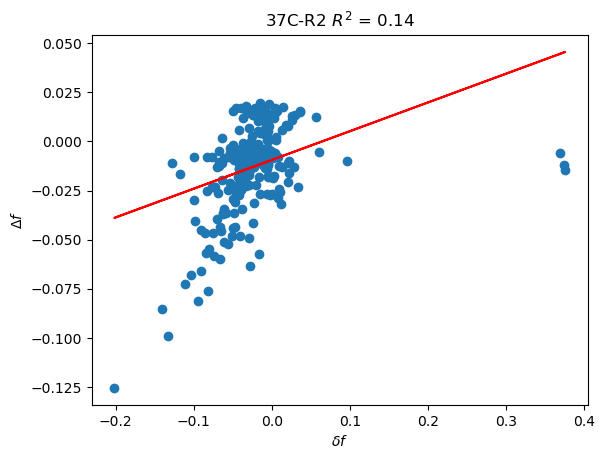

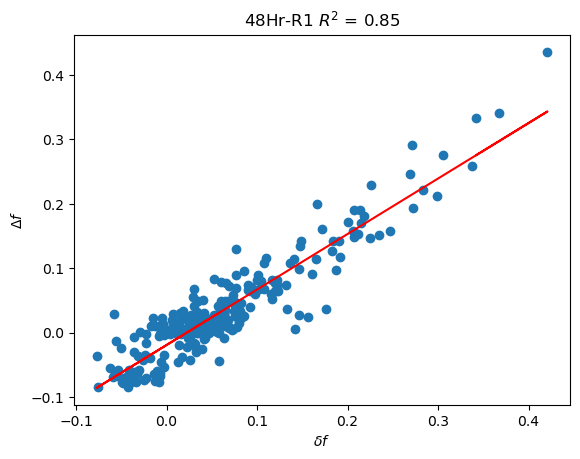

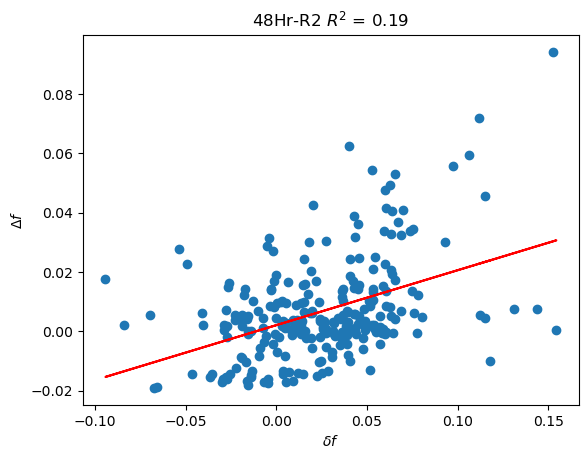

/Users/yanjiahao/anaconda3/envs/Bio/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/Users/yanjiahao/anaconda3/envs/Bio/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/yanjiahao/anaconda3/envs/Bio/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


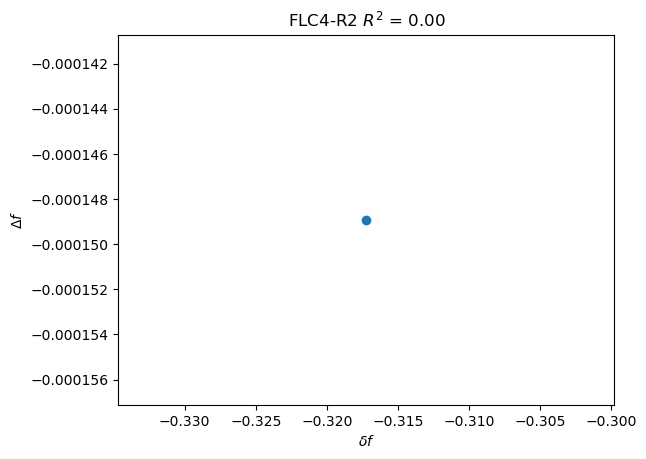

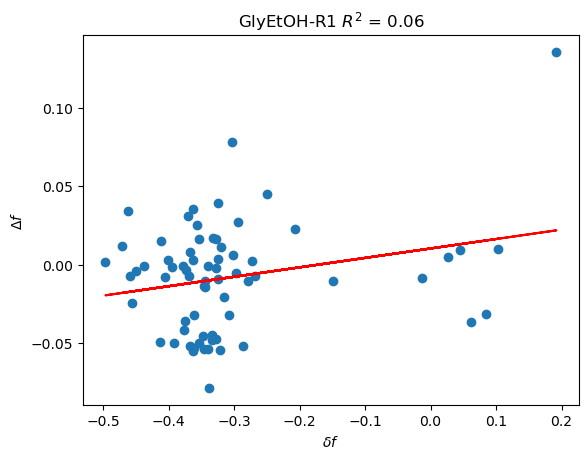

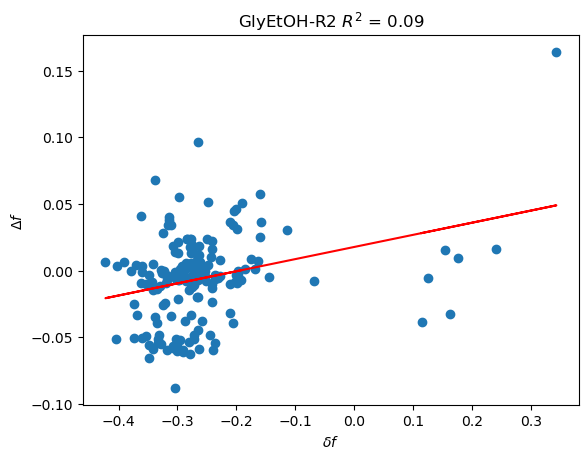

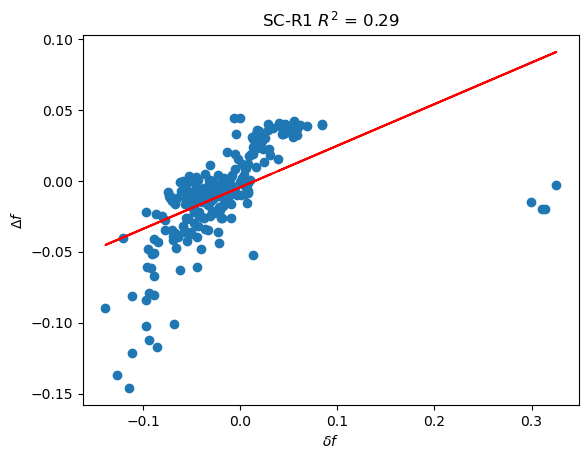

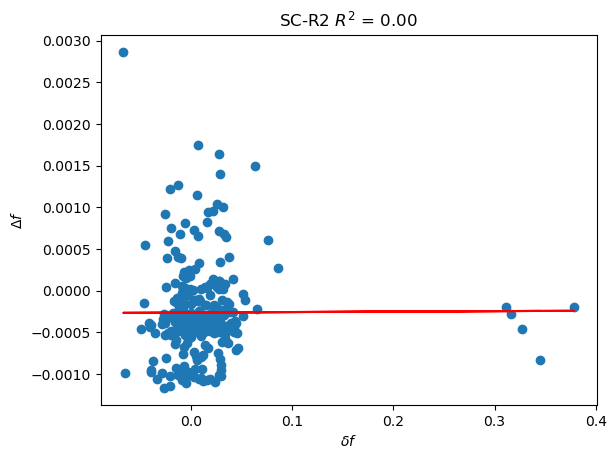

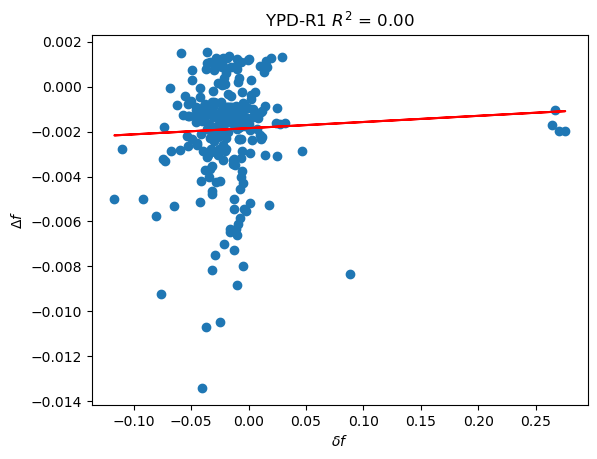

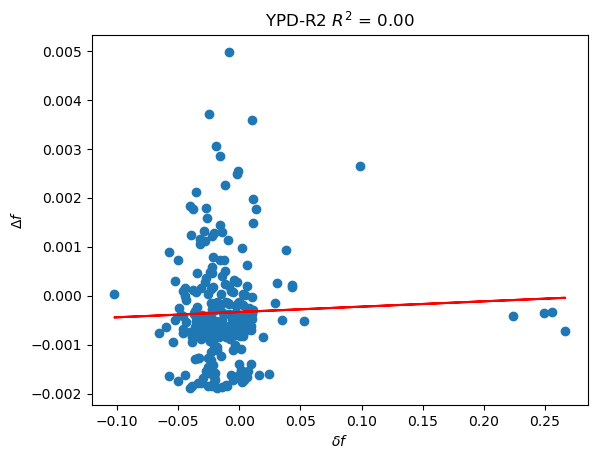

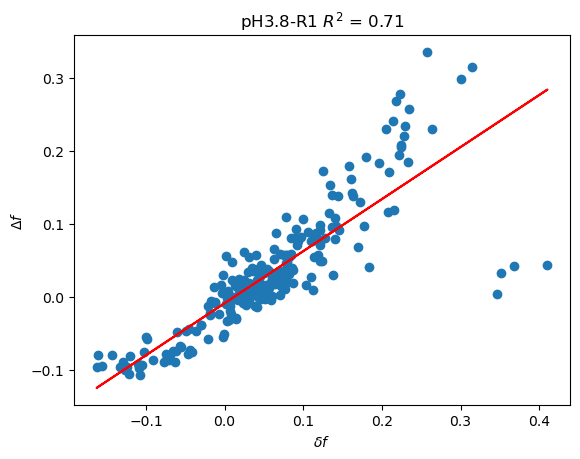

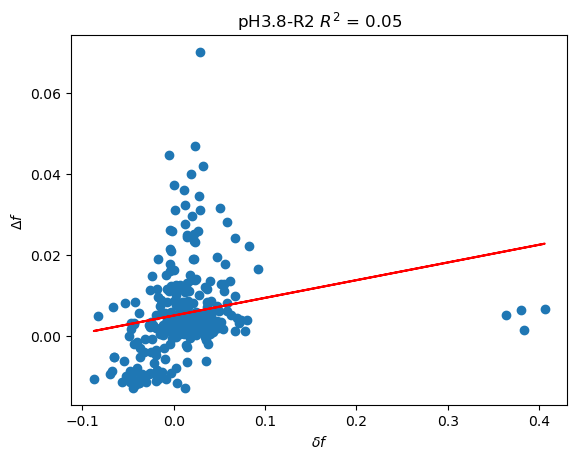

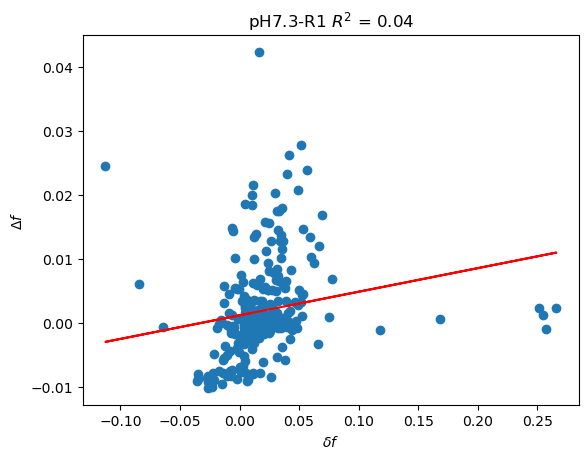

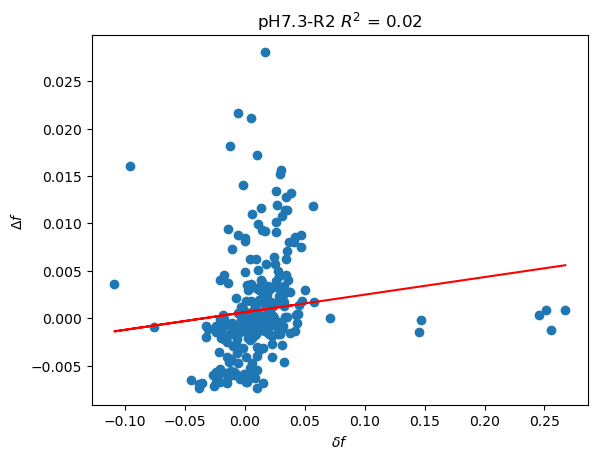

In [9]:
for i in range(delta_f.shape[1]):
    del_nan = delta_f[assay_labels[i]].values[~np.isnan(delta_f[assay_labels[i]].values)]
    Del_nan = Delta_f[assay_labels[i]].values[~np.isnan(Delta_f[assay_labels[i]].values)]
    slope, intercept, rvalue, pvalue, std = linregress(del_nan, Del_nan)
    line = slope * del_nan + intercept

    plt.scatter(x = del_nan, y=Del_nan)
    plt.plot(del_nan, line, color='red')
    plt.xlabel('$\delta f$')
    plt.ylabel('$\Delta f$')
    plt.title(assay_labels[i] +' $R^2$ = {:.2f}'.format(rvalue**2))
    # plt.legend('$R^2$ = '+ str(res.rvalue**2))
    
    # plt.savefig('.//try//'+assay_labels[i]+'.png')
    plt.show()